In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using BenchmarkTools

using SciPy
using Statistics

using CairoMakie

In [2]:
function HR!(du, u, p, t)
    
    function sigma(x)
            return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du[1] = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du[2] = c - d * x1 ^2 - y1
    du[3] = r * ( s * ( x1 - xr ) - z1 )
    
    du[4] = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du[5] = c - d * x2 ^2 - y2
    du[6] = r * ( s * ( x2 - xr ) - z2 )
    
    return SVector(du[1], du[2], du[3],
                    du[4], du[5], du[6])
end

HR! (generic function with 1 method)

In [3]:
u0 = [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
tspan = (0., 100000.)

a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1= -0.17; k2 = -0.17;
k = 0.

0.0

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

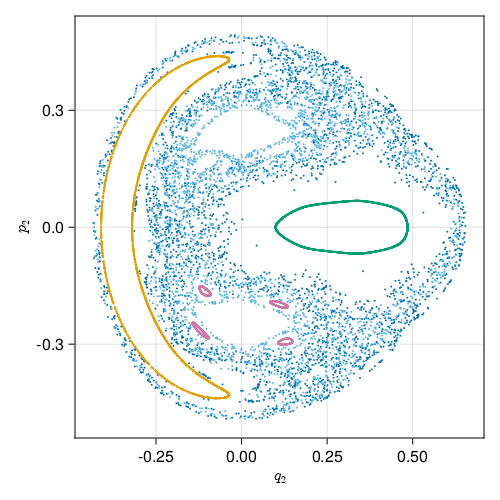

In [2]:
hh = Systems.henonheiles()

plane = (1, 0.0)
u0s = [[0.0, -0.25, 0.42081, 0.0],
[0.0, -0.31596, 0.354461, 0.0591255],
[0.0, 0.1, 0.5, 0.0],
[0.0, -0.0910355, 0.459522, -0.173339],
[0.0, -0.205144, 0.449328, -0.0162098]]

fig = Figure(resolution = (500,500))
ax = Axis(fig[1,1]; xlabel = L"q_2", ylabel = L"p_2")
for u0 in u0s
    psos = poincaresos(hh, plane, 20000.0; u0 = u0)
    scatter!(ax, psos[:, 2], psos[:, 4]; markersize = 2.0)
end
fig

In [4]:
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]
HR = ContinuousDynamicalSystem(HR!,  u0, p )

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

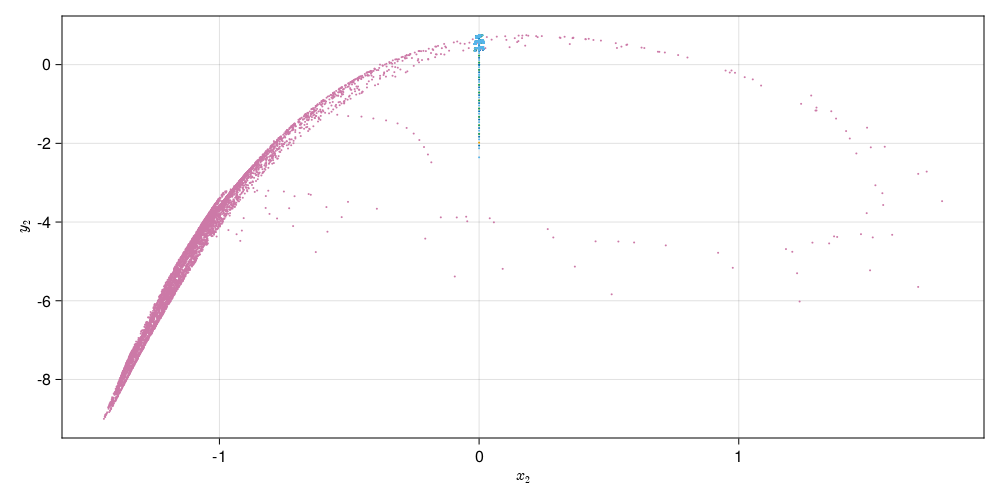

In [11]:
plane = (1, 0.)
u0s = [[0., 0., 0., 0., 0., 0.],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
    [0.0, 0.0, 0.0, -0.5, 0.0, 0.0],
    [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4]
    

    
    
    
    
    ]


fig = Figure(resolution = (1000,500))
ax1 = Axis(fig[1,1]; xlabel = L"x_2", ylabel = L"y_2")
for u0 in u0s
    psos = poincaresos(HR, plane, 200000.0, u0 = u0;  diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    scatter!(ax1, psos[:, 4], psos[:, 5]; markersize = 2.0)
end
fig

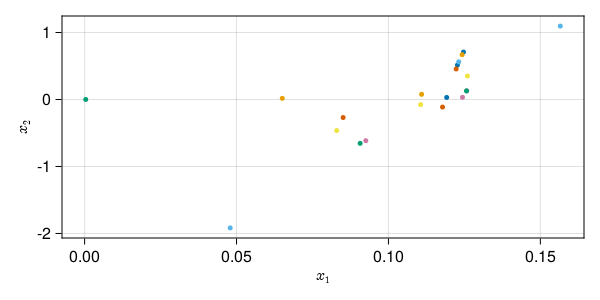

In [8]:
plane = (3, 0.0)

u0s = [
    [0., 0., 0.0,  -0.2, 0., 0.],
    [0., 0., 0.0,  -0.1, 0., 0.],
    [0., 0., 0.0, 0., 0., 0.],
    [0., 0.1, 0.0, 0.1, 0.1, 0.1],
    [0., 1.1, 0.0, 0.1, 1.1, 1.1],
    [0., -0.3, 0.0, -0.3, -0.3, -1.3],
    [0., -0.5, 0.0, -0.3, -0.5, -1.3],
    [0., 0.5, 0.0, 0.5, 0.5, 0.5],
    [0., 0.05, 0.0, 0.35, 0.05, 0.35],
    [0., 0.1, 0.0, 0., 0.1, 0.2],
    [0., 0.0, 0.0, 0., -1.2, 0.0],
    [0., -2., 0.0, 1., 2., 1.],
    [0., -0.15, 0.0, 0., 0.15, 0.2],
    [0., -0.11, 0.0,  0.2, 0., -0.11],
    [0., 0.7, 0.0, 0.7, 0.7, 0.7],
    [0., 0.66, 0.0, 0.66, 0.66, 0.66],
    [0., -0.7, 0.0, -0.7, -0.7, -0.7],
    [0., -0.66, 0.0, -0.66, -0.66, -0.66],
    [0., 0.55, 0.0, 0.55, 0.55, 0.55],
    [0., 0.44, 0.0, 0.44, 0.44, 0.44],
    [0., 0.33, 0.0, 0.22, 0.22, 0.22]
    
    
    
    
    
]

fig = Figure(resolution = (600,300))
ax1 = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2")
for u0 in u0s
    psos = poincaresos(HR, plane, 20000.0, u0 = u0;  diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    scatter!(ax1, psos[:, 1], psos[:, 2]; markersize = 5.0)
end
fig

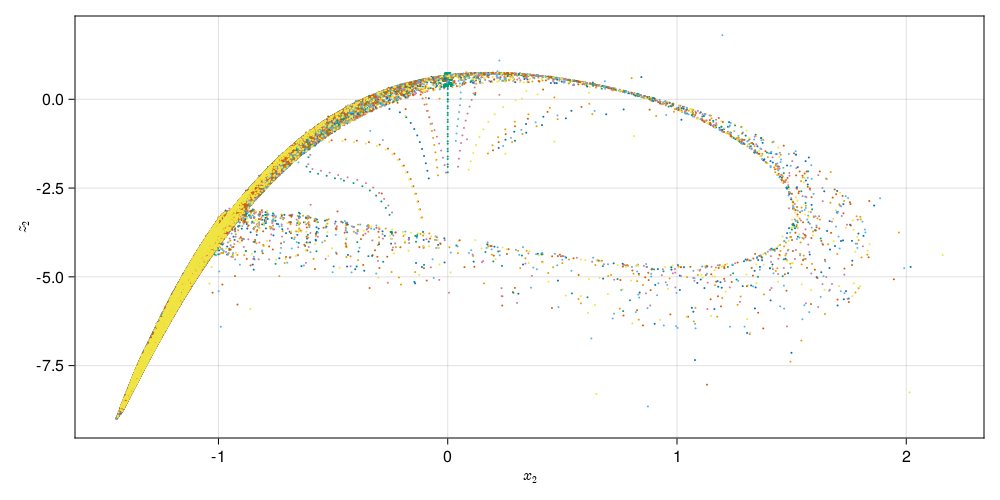

In [67]:
plane = (1, 0.)
u0s = [
    [0., 0., 0.,  -0.2, 0., 0.],
    [0., 0., 0.,  -0.1, 0., 0.],
    [0., 0., 0., 0., 0., 0.],
    [0., 0.1, 0.1, 0.1, 0.1, 0.1],
    [0., 1.1, 1.1, 0.1, 1.1, 1.1],
    [0., -0.3, -1.3, -0.3, -0.3, -1.3],
    [0., -0.5, -1.3, -0.3, -0.5, -1.3],
    [0., 0.5, 0.5, 0.5, 0.5, 0.5],
    [0., 0.05, 0.35, 0.35, 0.05, 0.35],
    [0., 0.1, 0.2, 0., 0.1, 0.2],
    [0., 0.0, 0.0, 0., -1.2, 0.0],
    [0., -2., -1., 1., 2., 1.],
    [0., -0.15, -0.2, 0., 0.15, 0.2],
    [0., -0.11, -0.11,  0.2, 0., -0.11],
    [0., 0.7, 0.7, 0.7, 0.7, 0.7],
    [0., 0.66, 0.66, 0.66, 0.66, 0.66],
    [0., -0.7, -0.7, -0.7, -0.7, -0.7],
    [0., -0.66, -0.66, -0.66, -0.66, -0.66],
    [0., 0.55, 0.55, 0.55, 0.55, 0.55],
    [0., 0.44, 0.44, 0.44, 0.44, 0.44],
    [0., 0.33, 0.33, 0.22, 0.22, 0.22]
    
    
    
    
    
]

fig = Figure(resolution = (1000,500))
ax1 = Axis(fig[1,1]; xlabel = L"x_2", ylabel = L"z_2")
for u0 in u0s
    psos = poincaresos(HR, plane, 200000.0, u0 = u0;  diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    scatter!(ax1, psos[:, 4], psos[:, 5]; markersize = 2.0)
end
fig

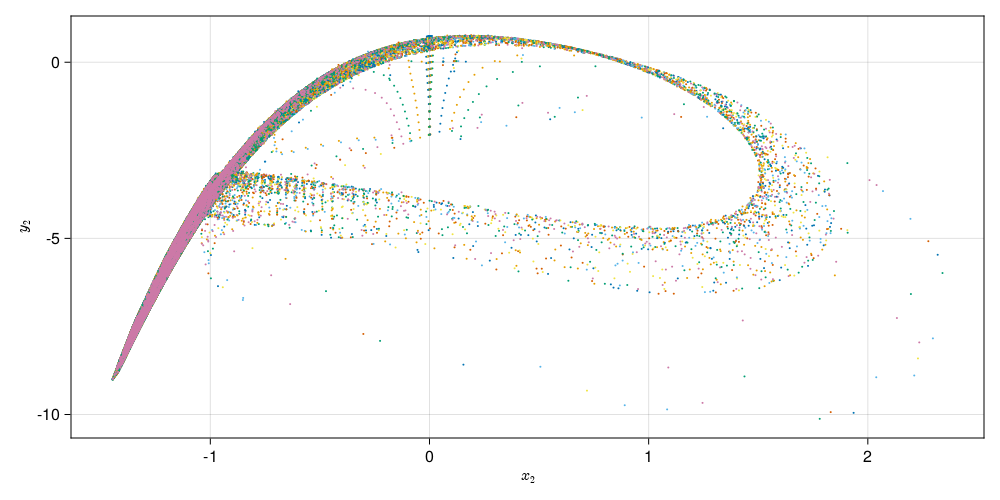

In [13]:
plane = (1, 0.)
u0s = [[0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0.1],
    [0., 0., 0., 0., 0., 0.2],
    [0., 0., 0., 0., 0., 0.3],
    [0., 0., 0., 0., 0.1, 0.],
    [0., 0., 0., 0., 0.2, 0.],
    [0., 0., 0., 0., 0.3, 0.],
    [0., 0., 0., 0.1, 0., 0.],
    [0., 0., 0., 0.2, 0., 0.],
    [0., 0., 0., 0.3, 0., 0.],
    [0., 0., 0.1, 0., 0., 0.],
    [0., 0., 0.2, 0., 0., 0.],
    [0., 0., 0.3, 0., 0., 0.],
    [0., 0.1, 0., 0., 0., 0.],
    [0., 0.2, 0., 0., 0., 0.],
    [0., 0.3, 0., 0., 0., 0.],
    
    [0., 0., 0., 0., 0., -0.1],
    [0., 0., 0., 0., 0., -0.2],
    [0., 0., 0., 0., 0., -0.3],
    [0., 0., 0., 0., -0.1, 0.],
    [0., 0., 0., 0., -0.2, 0.],
    [0., 0., 0., 0., -0.3, 0.],
    [0., 0., 0., -0.1, 0., 0.],
    [0., 0., 0., -0.2, 0., 0.],
    [0., 0., 0., -0.3, 0., 0.],
    [0., 0., -0.1, 0., 0., 0.],
    [0., 0., -0.2, 0., 0., 0.],
    [0., 0., -0.3, 0., 0., 0.],
    [0., -0.1, 0., 0., 0., 0.],
    [0., -0.2, 0., 0., 0., 0.],
    [0., -0.3, 0., 0., 0., 0.],
    
    [0., 0.1, 0.2, 0.3, 0.4, 0.5],
    [0., 0.5, 0.4, 0.3, 0.2, 0.1],
    [0., 0.2, 0.1, 0.3, 0.5, 0.4],
    [0., 0.4, 0.5, 0.3, 0.1, 0.2],
    [0., -0.1, -0.2, -0.3, -0.4, -0.5],
    [0., -0.5, -0.4, -0.3, -0.2, -0.1],
    [0., -0.2, -0.1, -0.3, -0.5, -0.4],
    [0., -0.4, -0.5,- 0.3, -0.1, -0.2]
    
    
    
    
    ]


fig = Figure(resolution = (1000,500))
ax1 = Axis(fig[1,1]; xlabel = L"x_2", ylabel = L"y_2")
for u0 in u0s
    psos = poincaresos(HR, plane, 200000.0, u0 = u0;  diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    scatter!(ax1, psos[:, 4], psos[:, 5]; markersize = 2.0)
end
fig

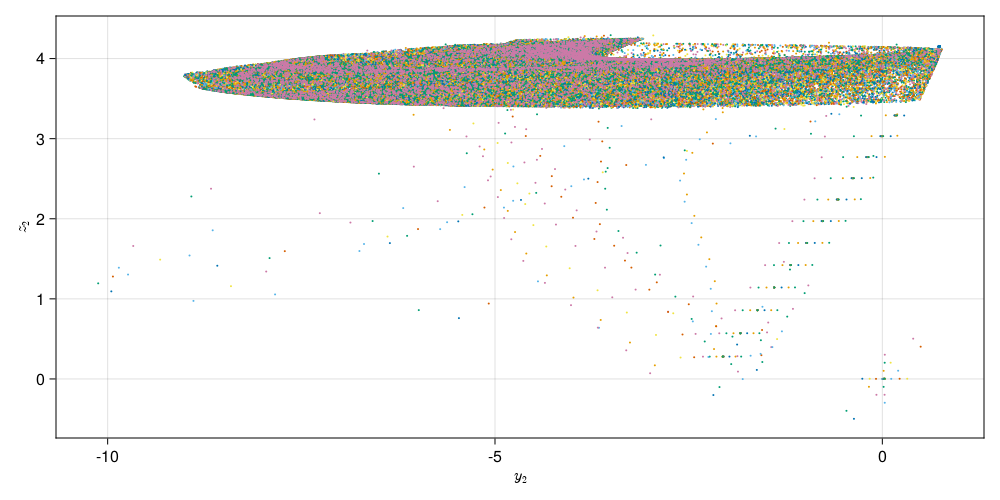

In [14]:
plane = (1, 0.)
u0s = [[0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0.1],
    [0., 0., 0., 0., 0., 0.2],
    [0., 0., 0., 0., 0., 0.3],
    [0., 0., 0., 0., 0.1, 0.],
    [0., 0., 0., 0., 0.2, 0.],
    [0., 0., 0., 0., 0.3, 0.],
    [0., 0., 0., 0.1, 0., 0.],
    [0., 0., 0., 0.2, 0., 0.],
    [0., 0., 0., 0.3, 0., 0.],
    [0., 0., 0.1, 0., 0., 0.],
    [0., 0., 0.2, 0., 0., 0.],
    [0., 0., 0.3, 0., 0., 0.],
    [0., 0.1, 0., 0., 0., 0.],
    [0., 0.2, 0., 0., 0., 0.],
    [0., 0.3, 0., 0., 0., 0.],
    
    [0., 0., 0., 0., 0., -0.1],
    [0., 0., 0., 0., 0., -0.2],
    [0., 0., 0., 0., 0., -0.3],
    [0., 0., 0., 0., -0.1, 0.],
    [0., 0., 0., 0., -0.2, 0.],
    [0., 0., 0., 0., -0.3, 0.],
    [0., 0., 0., -0.1, 0., 0.],
    [0., 0., 0., -0.2, 0., 0.],
    [0., 0., 0., -0.3, 0., 0.],
    [0., 0., -0.1, 0., 0., 0.],
    [0., 0., -0.2, 0., 0., 0.],
    [0., 0., -0.3, 0., 0., 0.],
    [0., -0.1, 0., 0., 0., 0.],
    [0., -0.2, 0., 0., 0., 0.],
    [0., -0.3, 0., 0., 0., 0.],
    
    [0., 0.1, 0.2, 0.3, 0.4, 0.5],
    [0., 0.5, 0.4, 0.3, 0.2, 0.1],
    [0., 0.2, 0.1, 0.3, 0.5, 0.4],
    [0., 0.4, 0.5, 0.3, 0.1, 0.2],
    [0., -0.1, -0.2, -0.3, -0.4, -0.5],
    [0., -0.5, -0.4, -0.3, -0.2, -0.1],
    [0., -0.2, -0.1, -0.3, -0.5, -0.4],
    [0., -0.4, -0.5,- 0.3, -0.1, -0.2]
    
    ]


fig = Figure(resolution = (1000,500))
ax1 = Axis(fig[1,1]; xlabel = L"y_2", ylabel = L"z_2")
for u0 in u0s
    psos = poincaresos(HR, plane, 200000.0, u0 = u0;  diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    scatter!(ax1, psos[:, 5], psos[:, 6]; markersize = 2.0)
end
fig

In [ ]:
fig.save("")